# STOCK PRICE PREDICTION USING FBPROPHET

In [1]:
import sys
print (sys.version)
print(sys.executable)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
C:\Users\HP\anaconda3\python.exe


## 1. AMAZON

### Importing Libraries

In [11]:
#imports
import pandas as pd
import numpy as np
from fbprophet import Prophet

import matplotlib.pyplot as plt
from functools import reduce


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import logging, sys
logging.disable(sys.maxsize)
 

pd.options.display.float_format = "{:,.2f}".format

### Reading of Data From the directory

In [2]:
AMAZON = pd.read_csv('C:/Users/HP/Desktop/Stock market prediction/AMAZON.csv')

In [3]:
AMAZON.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"2,516.00","2,516.00","2,516.00","2,516.00","2,516.00","2,516.00"
mean,"1,004.71","1,015.30",992.65,"1,004.35","1,004.35","4,252,377.31"
std,883.72,893.85,871.76,882.81,882.81,"2,347,787.13"
min,169.62,174.55,166.97,173.10,173.10,"881,300.00"
25%,299.96,303.59,296.27,299.70,299.70,"2,752,825.00"
50%,665.58,674.39,659.29,664.65,664.65,"3,649,200.00"
75%,"1,680.00","1,699.93","1,661.03","1,675.07","1,675.07","4,962,775.00"
max,"3,547.00","3,552.25","3,486.69","3,531.45","3,531.45","24,134,200.00"


### Preparing Data for Prophet

In [ ]:
#### for prophet to work, we need to change the names of these columns Date and Close to ds and y.

In [4]:
AMAZON = AMAZON[['Date','Close']]

In [5]:
AMAZON.columns = ['ds', 'y']
AMAZON.head(10)

,ds,y
0,2011-04-01,180.13
1,2011-04-04,182.94
2,2011-04-05,185.29
3,2011-04-06,182.76
4,2011-04-07,184.91
5,2011-04-08,184.71
6,2011-04-11,184.04
7,2011-04-12,180.48
8,2011-04-13,182.29
9,2011-04-14,181.82


### Visualizing of Data of Closed Price

<AxesSubplot:title={'center':'AMAZON STOCK PRICES'}, xlabel='ds'>

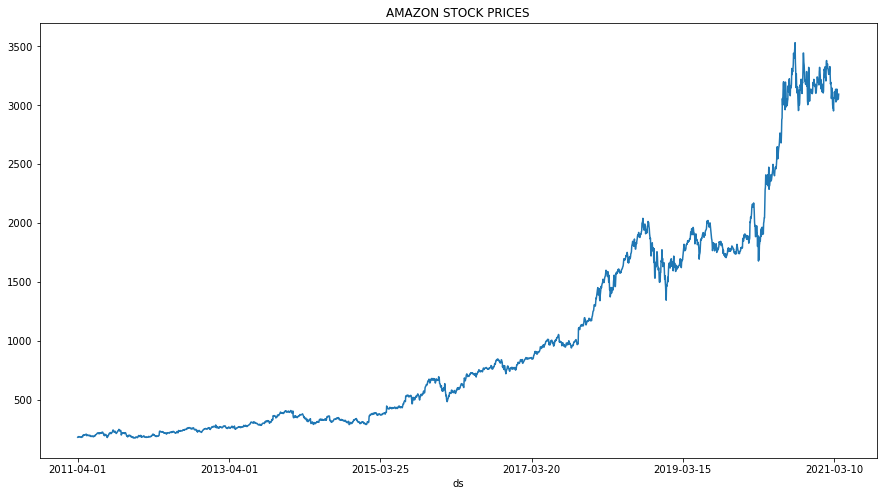

In [6]:
#prophet
AMAZON.set_index('ds').y.plot(figsize=(15,8), title = 'AMAZON STOCK PRICES')

### Prophet Model
#### To activate the Prophet Model, call Prophet() and assign it to a variable called model. Next fit our stock data to the model by calling the fit method.

In [12]:
model = Prophet()
model.fit(AMAZON)

#### For the creation of future dates, we used a helper function in prophet called make_future_dataframe with the forecasting period of 365 days.
#### Stocks are traded only in weekdays. So, we need to remove the weekends for that we used Boolean expression.
#### The Boolean expression stating that Monday is 0 and Saturday is 5 and if a day is not equal to 0-4 then return as false.

In [13]:
future = model.make_future_dataframe(365, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

future.tail()

,ds
2874,2022-03-25
2877,2022-03-28
2878,2022-03-29
2879,2022-03-30
2880,2022-03-31


In [14]:
forecast = model.predict(future)

In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3025,2022-03-25,"4,125.02","3,752.74","4,366.99","3,869.01","4,369.49",-65.64,-65.64,-65.64,-4.31,-4.31,-4.31,-61.33,-61.33,-61.33,0.00,0.00,0.00,"4,059.38"
3026,2022-03-28,"4,131.93","3,783.29","4,362.56","3,869.86","4,379.06",-60.81,-60.81,-60.81,-3.07,-3.07,-3.07,-57.74,-57.74,-57.74,0.00,0.00,0.00,"4,071.12"
3027,2022-03-29,"4,134.23","3,775.20","4,378.28","3,870.83","4,381.97",-57.85,-57.85,-57.85,-1.51,-1.51,-1.51,-56.34,-56.34,-56.34,0.00,0.00,0.00,"4,076.38"
3028,2022-03-30,"4,136.53","3,775.75","4,386.15","3,871.81","4,384.84",-54.55,-54.55,-54.55,0.29,0.29,0.29,-54.84,-54.84,-54.84,0.00,0.00,0.00,"4,081.98"
3029,2022-03-31,"4,138.83","3,803.10","4,393.32","3,872.84","4,387.71",-53.99,-53.99,-53.99,-0.74,-0.74,-0.74,-53.24,-53.24,-53.24,0.00,0.00,0.00,"4,084.85"


In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-04-01,167.18,-55.11,272.77,167.18,167.18,-55.50,-55.50,-55.50,-4.80,-4.80,-4.80,-50.70,-50.70,-50.70,0.00,0.00,0.00,111.67
1,2011-04-04,167.59,-40.40,291.28,167.59,167.59,-47.64,-47.64,-47.64,-3.93,-3.93,-3.93,-43.71,-43.71,-43.71,0.00,0.00,0.00,119.94
2,2011-04-05,167.73,-30.87,293.38,167.73,167.73,-42.75,-42.75,-42.75,-1.51,-1.51,-1.51,-41.25,-41.25,-41.25,0.00,0.00,0.00,124.97
3,2011-04-06,167.86,-39.70,296.21,167.86,167.86,-38.72,-38.72,-38.72,-0.01,-0.01,-0.01,-38.71,-38.71,-38.71,0.00,0.00,0.00,129.14
4,2011-04-07,168.00,-35.41,295.22,168.00,168.00,-37.50,-37.50,-37.50,-1.37,-1.37,-1.37,-36.12,-36.12,-36.12,0.00,0.00,0.00,130.50


### Visualization of Forecast
#### Prophet has a plotting mechanism called plot.  
#### This plot functionality draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).

<Figure size 1152x432 with 0 Axes>

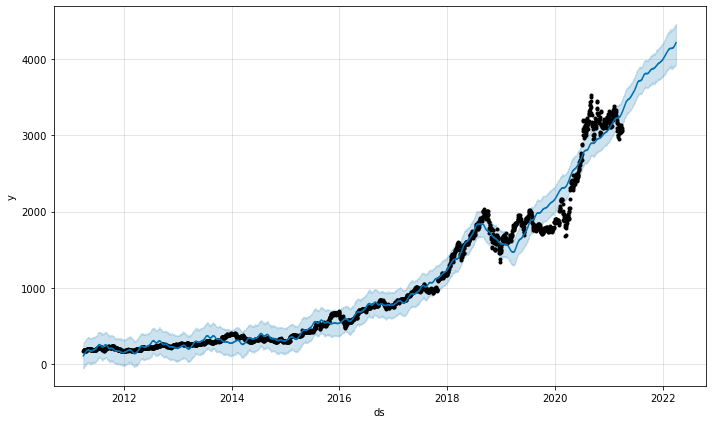

In [16]:
plt.figure(figsize=(16,6))
model.plot(forecast);

### Forecasting Components
#### Prophet take at the components of our model, including the holidays. 
#### This component plot is an important plot including the trend and seasonality (identified in the yearly pane).

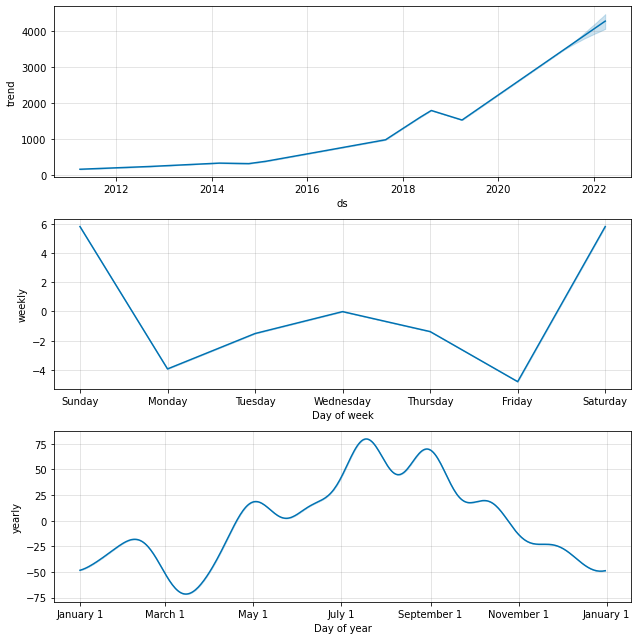

In [17]:
model.plot_components(forecast);

### Forecasting Graph

In [18]:
AMAZON['ds'] = pd.to_datetime(AMAZON['ds'])

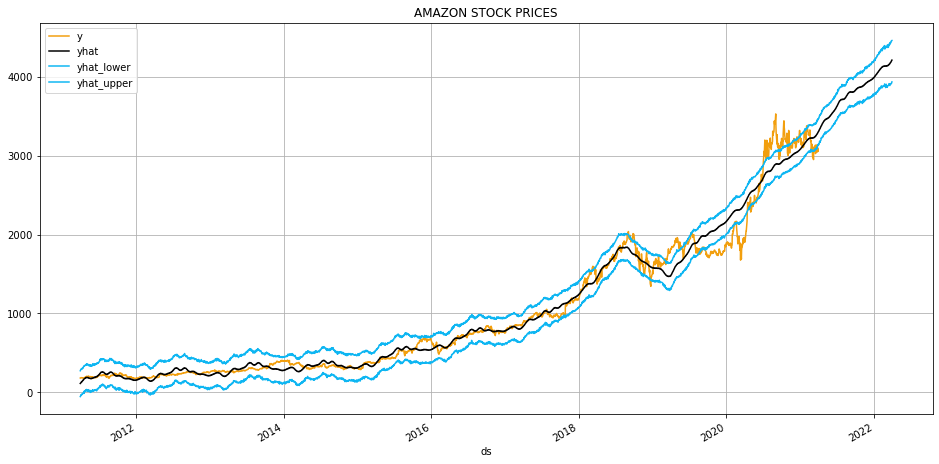

In [19]:
AMAZON_forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(AMAZON, AMAZON_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8), title= 'AMAZON STOCK PRICES',color=['#F29F0E', "#000000", "#0EB6F2", "#0EB6F2"], grid=True);

In [21]:
AMAZON_forecast.head()

,ds,yhat,yhat_lower,yhat_upper
0,2011-04-01,111.67,-55.11,272.77
1,2011-04-04,119.94,-40.40,291.28
2,2011-04-05,124.97,-30.87,293.38
3,2011-04-06,129.14,-39.70,296.21
4,2011-04-07,130.50,-35.41,295.22


In [22]:
metric_AMAZON = forecast.set_index('ds')[['yhat']].join(AMAZON.set_index('ds').y).reset_index()
metric_AMAZON.dropna(inplace=True)
metric_AMAZON.tail()

,ds,yhat,y
2511,2021-03-25,"3,275.64","3,046.26"
2512,2021-03-26,"3,276.37","3,052.03"
2513,2021-03-29,"3,290.32","3,075.73"
2514,2021-03-30,"3,297.30","3,055.29"
2515,2021-03-31,"3,303.43","3,094.08"


In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(metric_AMAZON.y,metric_AMAZON.yhat))
print('Mean Squared Error:',mean_squared_error(metric_AMAZON.y,metric_AMAZON.yhat))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(metric_AMAZON.y,metric_AMAZON.yhat)))

Mean Absolute Error: 77.65379620247134
Mean Squared Error: 16629.598921057743
Root Mean Squared Error: 128.95580220004737


## 2. APPLE

In [23]:
#imports
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import logging, sys
logging.disable(sys.maxsize)
 

pd.options.display.float_format = "{:,.2f}".format

In [24]:
APPLE = pd.read_csv('C:/Users/HP/Desktop/Stock market prediction/APPLE.csv')
APPLE.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-04-01,12.54,12.56,12.26,12.31,10.60,418661600
1,2011-04-04,12.30,12.31,12.09,12.19,10.50,460084800
2,2011-04-05,12.04,12.22,12.00,12.10,10.43,482731200
3,2011-04-06,12.19,12.28,12.04,12.07,10.40,402539200
4,2011-04-07,12.07,12.16,12.00,12.07,10.40,373447200


In [25]:
APPLE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"2,516.00","2,516.00","2,516.00","2,516.00","2,516.00","2,516.00"
mean,39.04,39.45,38.62,39.05,37.34,"245,586,060.10"
std,28.00,28.37,27.57,27.98,28.58,"193,128,610.37"
min,11.31,11.35,11.09,11.26,9.70,"45,448,000.00"
25%,20.52,20.65,20.34,20.44,17.85,"111,897,225.00"
50%,29.00,29.21,28.74,28.95,26.84,"176,501,600.00"
75%,46.47,46.84,46.15,46.48,45.15,"317,972,200.00"
max,143.60,145.09,141.37,143.16,142.95,"1,506,120,000.00"


In [26]:
APPLE = APPLE[['Date','Close']]

In [27]:
APPLE.columns = ['ds', 'y']
APPLE.head(10)

,ds,y
0,2011-04-01,12.31
1,2011-04-04,12.19
2,2011-04-05,12.10
3,2011-04-06,12.07
4,2011-04-07,12.07
5,2011-04-08,11.97
6,2011-04-11,11.81
7,2011-04-12,11.87
8,2011-04-13,12.00
9,2011-04-14,11.87


<AxesSubplot:title={'center':'APPLE STOCK PRICES'}, xlabel='ds'>

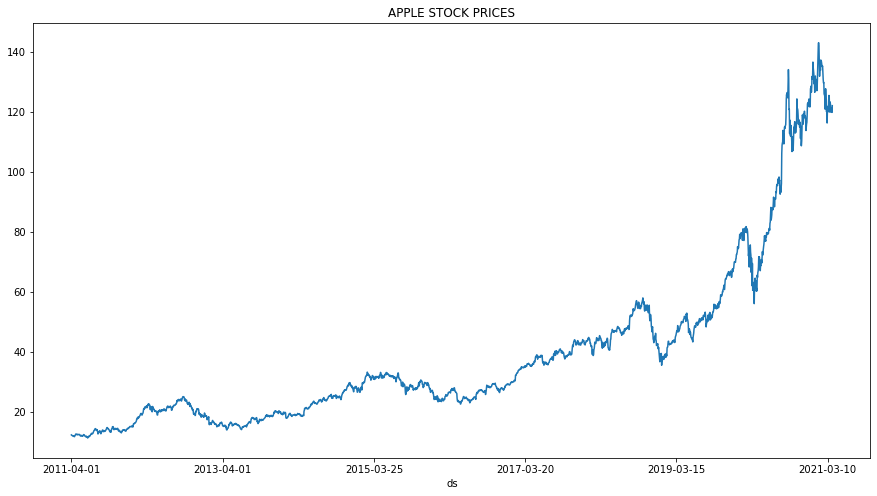

In [28]:
#prophet
APPLE.set_index('ds').y.plot(figsize=(15,8), title = 'APPLE STOCK PRICES')

In [29]:
model = Prophet()
model.fit(APPLE)

In [30]:
future = model.make_future_dataframe(365, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

future.tail()

,ds
2874,2022-03-25
2877,2022-03-28
2878,2022-03-29
2879,2022-03-30
2880,2022-03-31


In [31]:
forecast = model.predict(future)

In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2772,2022-03-25,177.61,164.47,185.41,168.56,186.20,-2.38,-2.38,-2.38,-0.31,-0.31,-0.31,-2.07,-2.07,-2.07,0.00,0.00,0.00,175.23
2773,2022-03-28,177.99,165.00,185.66,168.81,186.68,-2.07,-2.07,-2.07,-0.19,-0.19,-0.19,-1.88,-1.88,-1.88,0.00,0.00,0.00,175.92
2774,2022-03-29,178.12,165.25,186.04,168.86,186.84,-1.95,-1.95,-1.95,-0.15,-0.15,-0.15,-1.81,-1.81,-1.81,0.00,0.00,0.00,176.16
2775,2022-03-30,178.25,165.45,186.54,168.90,187.00,-1.87,-1.87,-1.87,-0.13,-0.13,-0.13,-1.73,-1.73,-1.73,0.00,0.00,0.00,176.38
2776,2022-03-31,178.37,166.44,186.83,168.97,187.16,-1.84,-1.84,-1.84,-0.18,-0.18,-0.18,-1.66,-1.66,-1.66,0.00,0.00,0.00,176.53


In [33]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-04-01,11.30,3.77,14.98,11.30,11.30,-1.91,-1.91,-1.91,-0.31,-0.31,-0.31,-1.60,-1.60,-1.60,0.00,0.00,0.00,9.39
1,2011-04-04,11.36,4.12,15.23,11.36,11.36,-1.58,-1.58,-1.58,-0.19,-0.19,-0.19,-1.39,-1.39,-1.39,0.00,0.00,0.00,9.78
2,2011-04-05,11.38,4.43,15.22,11.38,11.38,-1.47,-1.47,-1.47,-0.15,-0.15,-0.15,-1.32,-1.32,-1.32,0.00,0.00,0.00,9.91
3,2011-04-06,11.40,4.85,15.28,11.40,11.40,-1.39,-1.39,-1.39,-0.13,-0.13,-0.13,-1.26,-1.26,-1.26,0.00,0.00,0.00,10.00
4,2011-04-07,11.42,4.67,15.54,11.42,11.42,-1.39,-1.39,-1.39,-0.18,-0.18,-0.18,-1.20,-1.20,-1.20,0.00,0.00,0.00,10.03


<Figure size 1152x432 with 0 Axes>

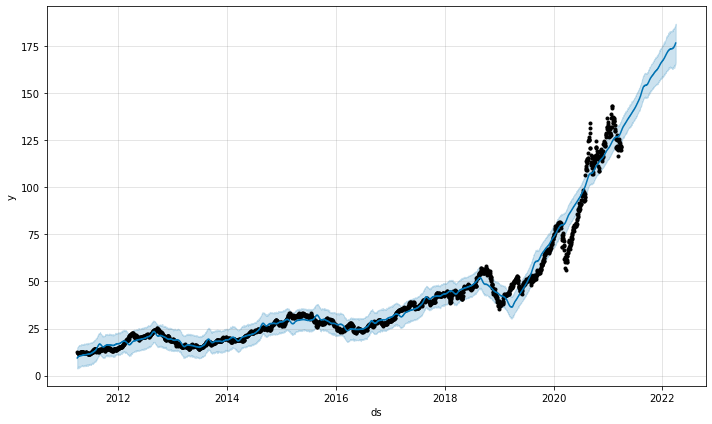

In [34]:
plt.figure(figsize=(16,6))
model.plot(forecast);

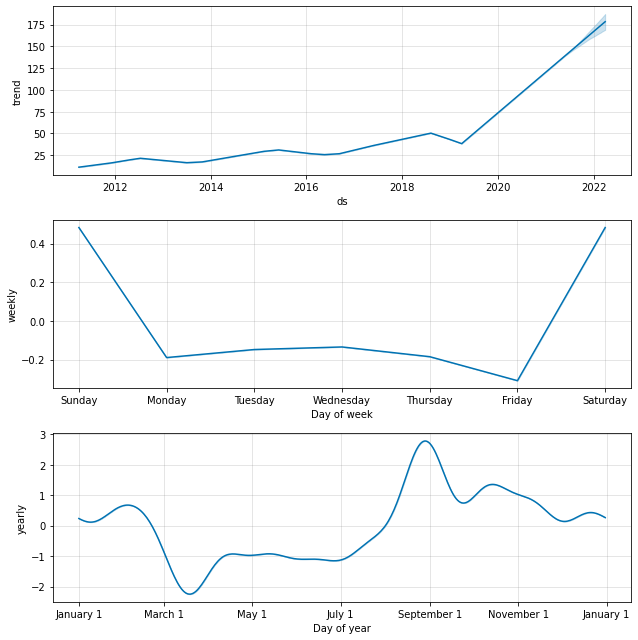

In [35]:
model.plot_components(forecast);

In [36]:
APPLE['ds'] = pd.to_datetime(APPLE['ds'])

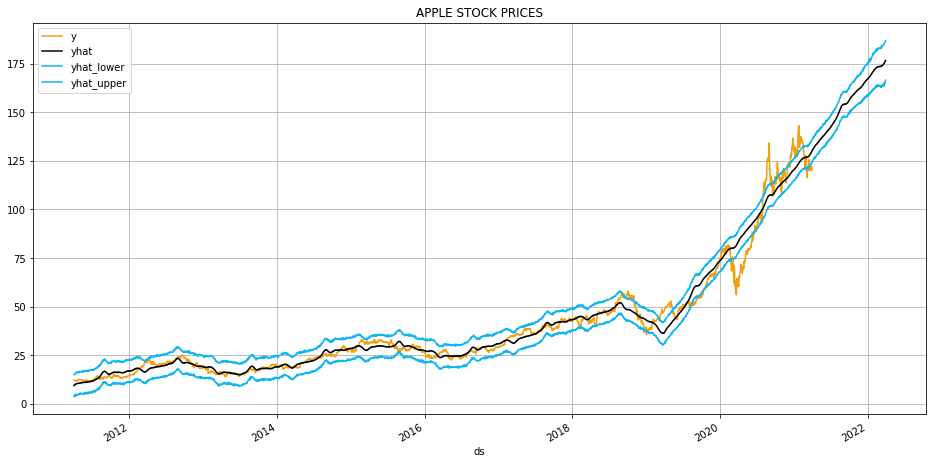

In [37]:
APPLE_forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(APPLE, APPLE_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8),title= 'APPLE STOCK PRICES', color=['#F29F0E', "#000000", "#0EB6F2", "#0EB6F2"], grid=True);

In [38]:
APPLE_forecast.head()

,ds,yhat,yhat_lower,yhat_upper
0,2011-04-01,9.39,3.77,14.98
1,2011-04-04,9.78,4.12,15.23
2,2011-04-05,9.91,4.43,15.22
3,2011-04-06,10.00,4.85,15.28
4,2011-04-07,10.03,4.67,15.54


In [56]:
metric_APPLE = forecast.set_index('ds')[['yhat']].join(APPLE.set_index('ds').y).reset_index()
metric_APPLE.dropna(inplace=True)
metric_APPLE.tail()

,ds,yhat,y
2764,2021-03-25,126.40,120.59
2765,2021-03-26,126.42,121.21
2766,2021-03-29,127.01,121.39
2767,2021-03-30,127.18,119.90
2768,2021-03-31,127.38,122.15


In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(metric_APPLE.y,metric_APPLE.yhat))
print('Mean Squared Error:',mean_squared_error(metric_APPLE.y,metric_APPLE.yhat))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(metric_APPLE.y,metric_APPLE.yhat)))

Mean Absolute Error: 2.7754684944520216
Mean Squared Error: 19.73795036145253
Root Mean Squared Error: 4.4427413115612


## 3. GOOGLE

In [39]:
GOOGLE = pd.read_csv('C:/Users/HP/Desktop/Stock market prediction/GOOGLE.csv')
GOOGLE.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-04-01,293.28,296.48,293.28,294.80,294.80,5245990
1,2011-04-04,295.39,296.26,290.46,292.74,292.74,4124402
2,2011-04-05,289.46,289.66,281.78,283.48,283.48,12140335
3,2011-04-06,285.02,286.51,282.94,286.02,286.02,5356603
4,2011-04-07,286.79,289.24,286.02,288.92,288.92,5081977


In [40]:
GOOGLE = GOOGLE[['Date','Close']]

In [41]:
GOOGLE.columns = ['ds', 'y']
GOOGLE.head(10)

,ds,y
0,2011-04-01,294.80
1,2011-04-04,292.74
2,2011-04-05,283.48
3,2011-04-06,286.02
4,2011-04-07,288.92
5,2011-04-08,288.00
6,2011-04-11,287.61
7,2011-04-12,284.24
8,2011-04-13,287.06
9,2011-04-14,288.17


<AxesSubplot:title={'center':'GOOGLE STOCK PRICES'}, xlabel='ds'>

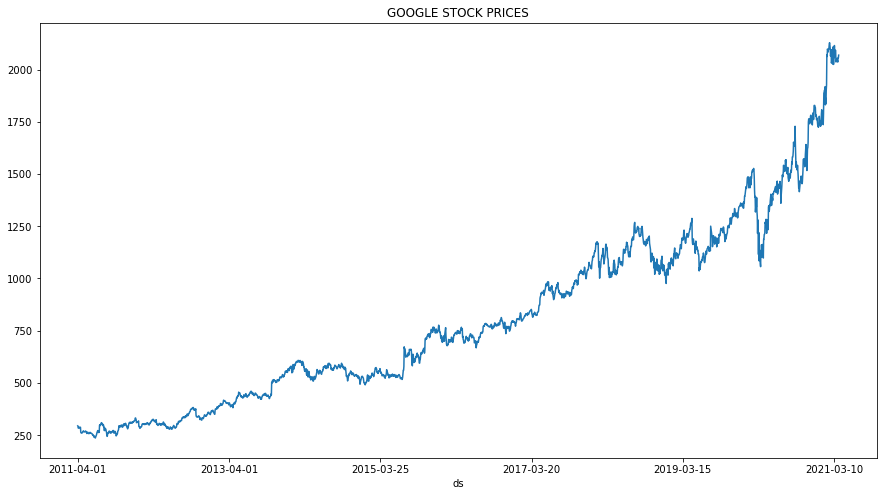

In [42]:
#prophet
GOOGLE.set_index('ds').y.plot(figsize=(15,8), title = 'GOOGLE STOCK PRICES')

In [43]:
model = Prophet()
model.fit(GOOGLE)

In [44]:
future = model.make_future_dataframe(365, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

future.tail()

,ds
2874,2022-03-25
2877,2022-03-28
2878,2022-03-29
2879,2022-03-30
2880,2022-03-31


In [45]:
forecast = model.predict(future)

In [46]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2772,2022-03-25,"2,235.99","2,109.19","2,358.44","2,138.91","2,327.53",-1.65,-1.65,-1.65,-3.35,-3.35,-3.35,1.71,1.71,1.71,0.00,0.00,0.00,"2,234.35"
2773,2022-03-28,"2,239.26","2,105.67","2,352.24","2,141.08","2,331.54",-8.09,-8.09,-8.09,-4.71,-4.71,-4.71,-3.38,-3.38,-3.38,0.00,0.00,0.00,"2,231.17"
2774,2022-03-29,"2,240.35","2,106.73","2,361.49","2,141.42","2,332.98",-8.50,-8.50,-8.50,-3.49,-3.49,-3.49,-5.01,-5.01,-5.01,0.00,0.00,0.00,"2,231.85"
2775,2022-03-30,"2,241.44","2,111.96","2,353.79","2,142.02","2,334.36",-9.12,-9.12,-9.12,-2.54,-2.54,-2.54,-6.58,-6.58,-6.58,0.00,0.00,0.00,"2,232.32"
2776,2022-03-31,"2,242.53","2,097.98","2,349.76","2,142.70","2,335.53",-11.33,-11.33,-11.33,-3.21,-3.21,-3.21,-8.11,-8.11,-8.11,0.00,0.00,0.00,"2,231.20"


In [47]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-04-01,276.20,185.41,341.56,276.20,276.20,-12.58,-12.58,-12.58,-3.35,-3.35,-3.35,-9.23,-9.23,-9.23,0.00,0.00,0.00,263.62
1,2011-04-04,276.43,177.77,336.66,276.43,276.43,-18.05,-18.05,-18.05,-4.71,-4.71,-4.71,-13.35,-13.35,-13.35,0.00,0.00,0.00,258.37
2,2011-04-05,276.51,179.27,342.33,276.51,276.51,-18.07,-18.07,-18.07,-3.49,-3.49,-3.49,-14.58,-14.58,-14.58,0.00,0.00,0.00,258.43
3,2011-04-06,276.58,180.02,335.53,276.58,276.58,-18.28,-18.28,-18.28,-2.54,-2.54,-2.54,-15.74,-15.74,-15.74,0.00,0.00,0.00,258.30
4,2011-04-07,276.66,179.31,334.56,276.66,276.66,-20.02,-20.02,-20.02,-3.21,-3.21,-3.21,-16.81,-16.81,-16.81,0.00,0.00,0.00,256.64


<Figure size 1152x432 with 0 Axes>

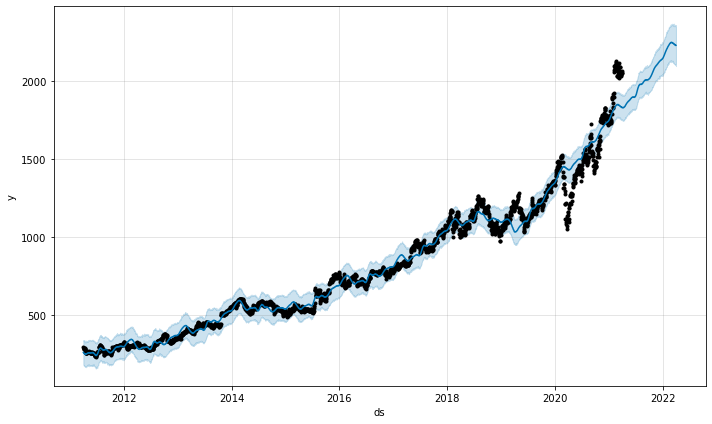

In [48]:
plt.figure(figsize=(16,6))
model.plot(forecast);

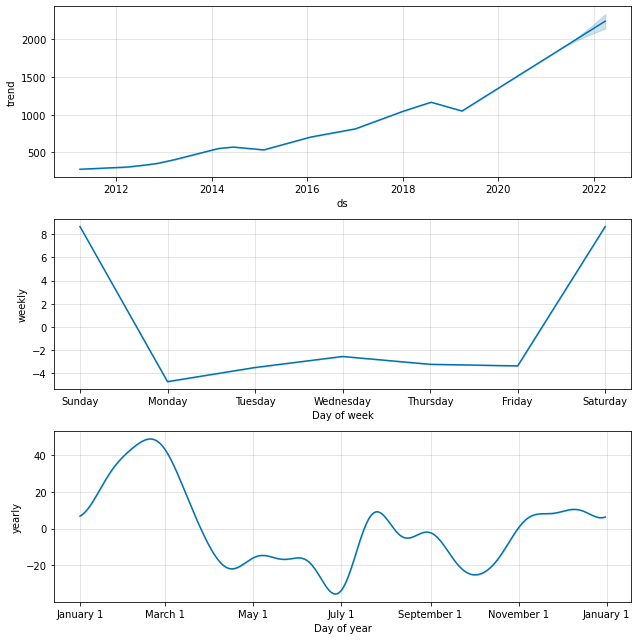

In [49]:
model.plot_components(forecast);

In [50]:
GOOGLE['ds'] = pd.to_datetime(GOOGLE['ds'])

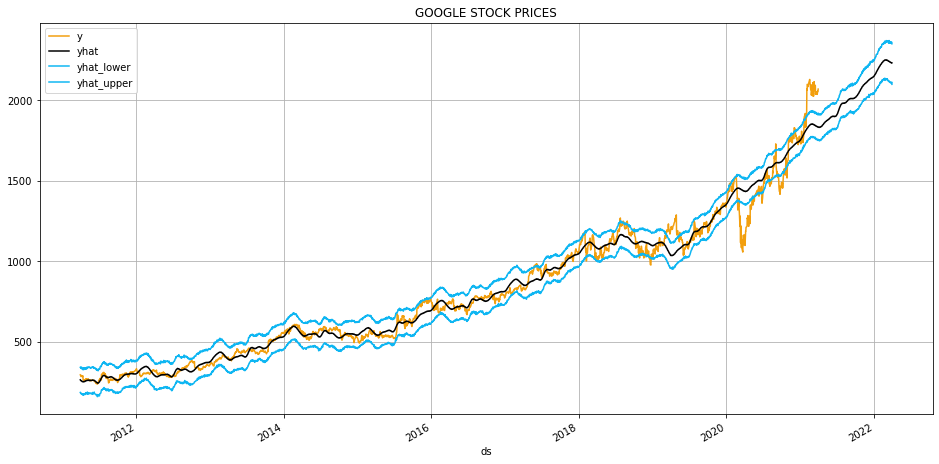

In [51]:
GOOGLE_forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(GOOGLE, GOOGLE_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8),title= 'GOOGLE STOCK PRICES', color=['#F29F0E', "#000000", "#0EB6F2", "#0EB6F2"], grid=True);

In [72]:
GOOGLE_forecast.head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-04-01,258.69,183.06,333.00
1,2010-04-05,252.17,174.65,331.12
2,2010-04-06,251.90,172.37,330.18
3,2010-04-07,251.94,178.01,330.69
4,2010-04-08,250.47,175.28,331.80


In [73]:
metric_GOOGLE = forecast.set_index('ds')[['yhat']].join(GOOGLE.set_index('ds').y).reset_index()
metric_GOOGLE.dropna(inplace=True)
metric_GOOGLE.tail()

,ds,yhat,y
2764,2021-03-25,"1,817.70","2,044.36"
2765,2021-03-26,"1,816.74","2,035.55"
2766,2021-03-29,"1,813.76","2,055.95"
2767,2021-03-30,"1,814.07","2,055.54"
2768,2021-03-31,"1,814.66","2,068.63"


In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(metric_GOOGLE.y,metric_GOOGLE.yhat))
print('Mean Squared Error:',mean_squared_error(metric_GOOGLE.y,metric_GOOGLE.yhat))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(metric_GOOGLE.y,metric_GOOGLE.yhat)))

Mean Absolute Error: 36.74722554240493
Mean Squared Error: 3538.3798347479387
Root Mean Squared Error: 59.48428224958202
